In [ ]:
import matplotlib.pyplot as plt
import pickle

In [ ]:
images=pickle.load(open("/content/drive/My Drive/TestImages/0862masks.pkl","rb"))

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from keras.models import load_model
SuperRes=load_model('/content/drive/My Drive/IoTDemo/srbestmodel100.h5')

In [ ]:
from matplotlib import image
from skimage.transform import resize, rescale
import cv2
import numpy as np
from skimage import img_as_ubyte

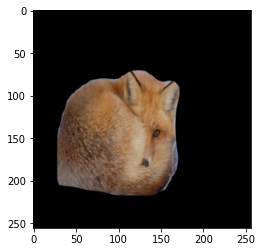

In [ ]:
testimage_resized = resize(images[0], (256, 256))
plt.imshow(testimage_resized)

In [ ]:
testimage_resized = img_as_ubyte(testimage_resized)

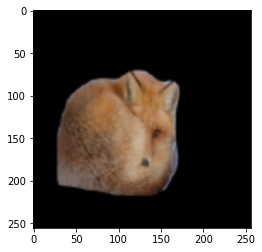

In [ ]:
testscale_percent = 50
testsrc=testimage_resized
testwidth = int(testsrc.shape[1] * testscale_percent / 100)
testheight = int(testsrc.shape[0] * testscale_percent / 100)
testdsize = (testwidth, testheight)
testoutput = cv2.resize(testsrc, testdsize)
testrescaled=cv2.resize(testoutput, (256,256))
plt.imshow(testrescaled)

In [ ]:
import tensorflow as tf
testimg=tf.expand_dims(testrescaled, axis=0)
testsr=SuperRes.predict(testimg)
testout=tf.keras.backend.squeeze(testsr, axis=0)
final=testout.numpy()
final=final.astype(int)

In [ ]:
from skimage.measure import compare_ssim
#Structural Similarity Index Between Original HR and LR Images
(score, diff) = compare_ssim(testimage_resized,testimage_resized, full=True,multichannel=True)
diff = (diff * 255).astype("uint8")
print("SSIM of Original HR vs Original HR: {}".format(score))

SSIM of Original HR vs Original HR: 1.0


In [ ]:
(score1, diff1) = compare_ssim(testimage_resized,testrescaled, full=True,multichannel=True)
diff1 = (diff1 * 255).astype("uint8")
print("SSIM of Original HR vs Original LR: {}".format(score1))

SSIM of Original HR vs Original LR: 0.9533226163838998


In [ ]:
(score2, diff2) = compare_ssim(testimage_resized,final, full=True,multichannel=True)
diff2 = (diff2 * 255).astype("uint8")
print("SSIM of Original HR vs SuperRes Output: {}".format(score2))

SSIM of Original HR vs SuperRes Output: 0.9768781851434382


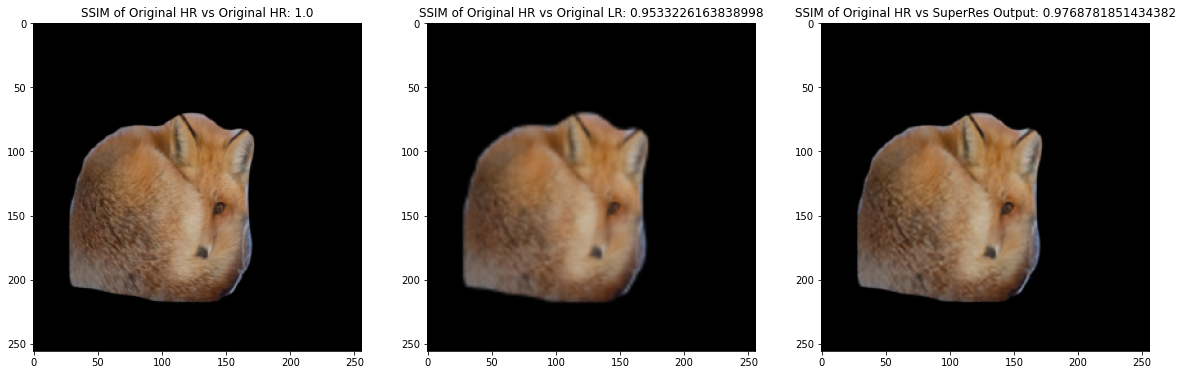

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.title("SSIM of Original HR vs Original HR: {}".format(score))
plt.imshow(testimage_resized)
plt.subplot(1,3,2)
plt.title("SSIM of Original HR vs Original LR: {}".format(score1))
plt.imshow(testrescaled)
plt.subplot(1,3,3)
plt.title("SSIM of Original HR vs SuperRes Output: {}".format(score2))
plt.imshow(final)

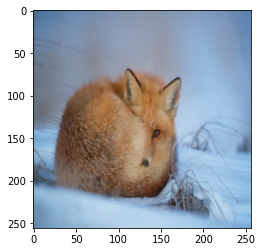

In [ ]:
# Super Imposing on the Original Images
superimpose  = image.imread('/content/drive/My Drive/TestImages/0862.png')
superimpose_resized = resize(superimpose, (256, 256))
plt.imshow(superimpose_resized)

In [ ]:
superimpose_resized = img_as_ubyte(superimpose_resized)

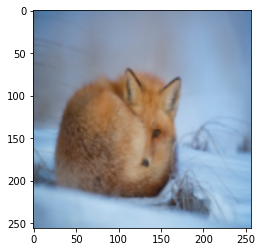

In [ ]:
superimposelr=cv2.resize(superimpose_resized, testdsize)
superimposerescaled=cv2.resize(superimposelr, (256,256))
plt.imshow(superimposerescaled)

In [ ]:
superimposeimg = tf.expand_dims(superimposerescaled, axis=0)

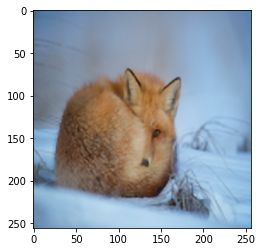

In [ ]:
testsuperimpose = SuperRes.predict(superimposeimg)
testsuperimposeout=tf.keras.backend.squeeze(testsuperimpose, axis=0)
finalsi=testsuperimposeout.numpy()
finalsi=finalsi.astype(int)
plt.imshow(finalsi)

SSIM of Original HR vs Original HR: 1.0
SSIM of Original HR vs Original LR: 0.9451528413516668
SSIM of Original HR vs SuperRes Output: 0.96462584951578611569544818848953582346439361572266
-------------------------------------------------------------------------------


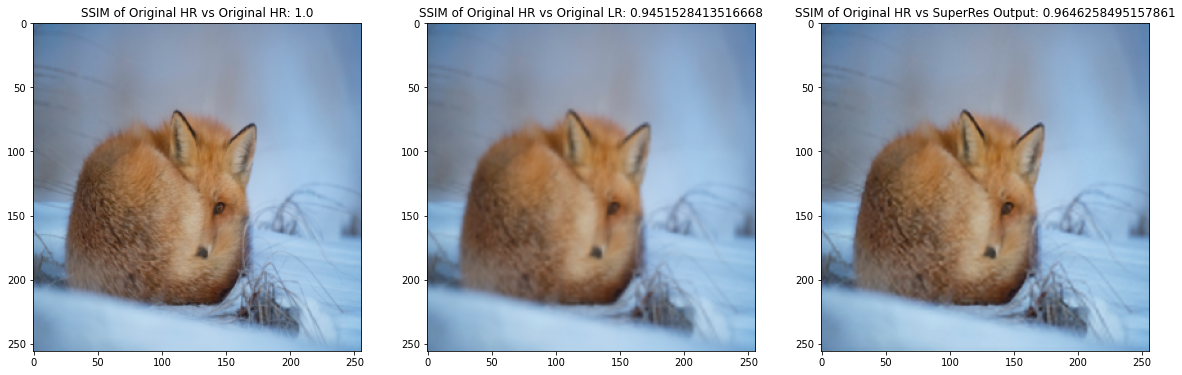

In [ ]:
#Structural Similarity Index Between Original HR and LR Images
(score, diff) = compare_ssim(superimpose_resized,superimpose_resized, full=True,multichannel=True)
diff = (diff * 255).astype("uint8")
print("SSIM of Original HR vs Original HR: {}".format(score))
(score1, diff1) = compare_ssim(superimpose_resized,superimposerescaled, full=True,multichannel=True)
diff1 = (diff1 * 255).astype("uint8")
print("SSIM of Original HR vs Original LR: {}".format(score1))
(score2, diff2) = compare_ssim(superimpose_resized,finalsi, full=True,multichannel=True)
diff2 = (diff2 * 255).astype("uint8")
print("SSIM of Original HR vs SuperRes Output: {:.50f}".format(score2))

print("-------------------------------------------------------------------------------")

plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.title("SSIM of Original HR vs Original HR: {}".format(score))
plt.imshow(superimpose_resized)
plt.subplot(1,3,2)
plt.title("SSIM of Original HR vs Original LR: {}".format(score1))
plt.imshow(superimposerescaled)
plt.subplot(1,3,3)
plt.title("SSIM of Original HR vs SuperRes Output: {}".format(score2))
plt.imshow(finalsi)

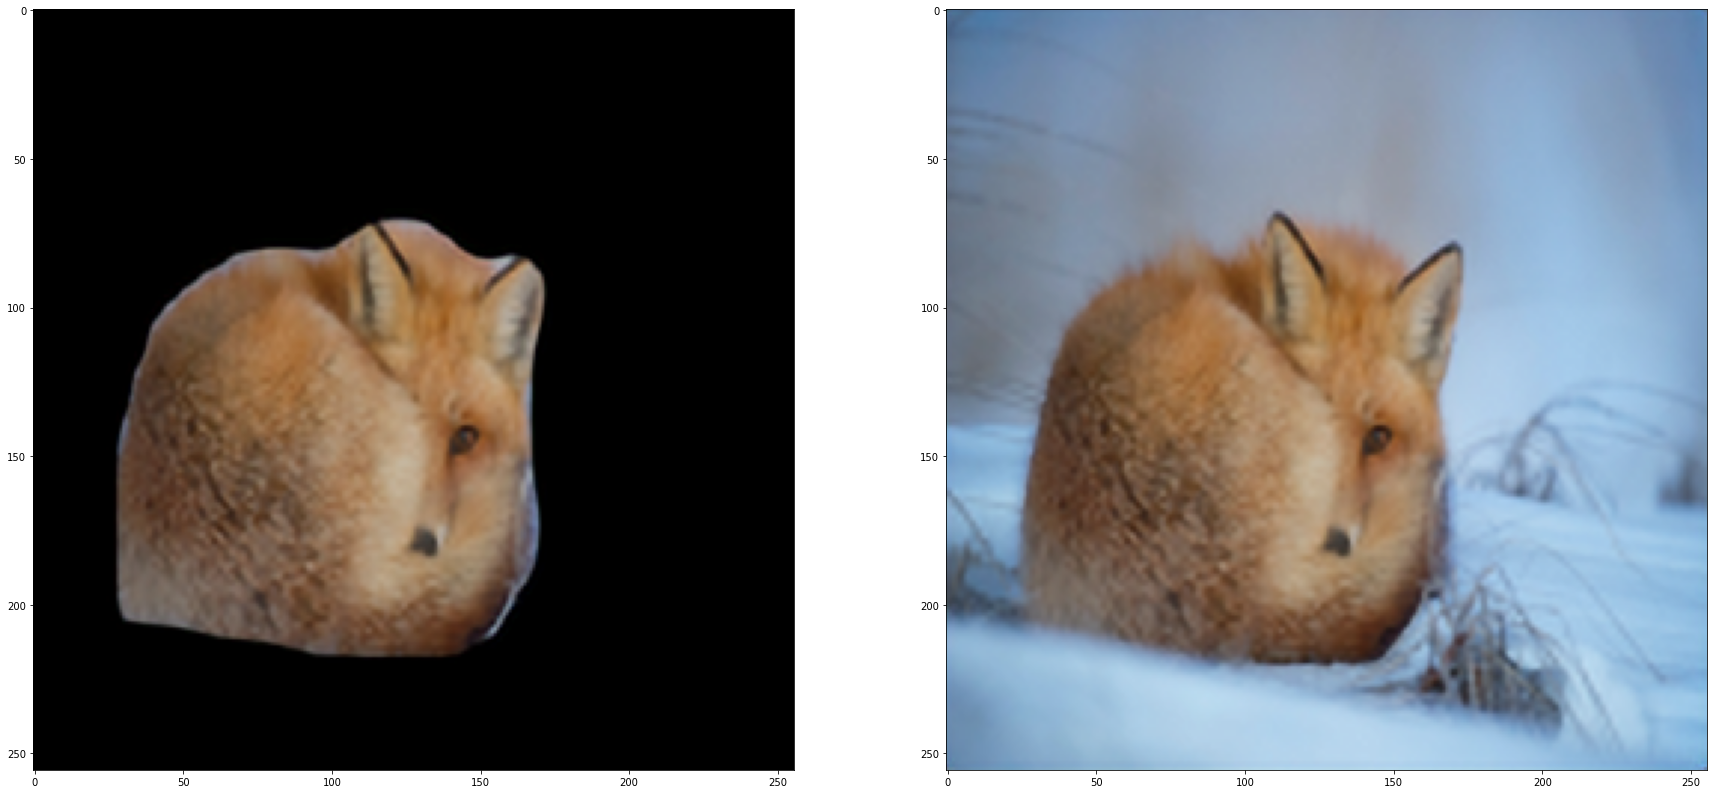

In [ ]:
plt.figure(figsize=(30,30))
plt.subplot(1,2,1)
plt.imshow(final)
plt.subplot(1,2,2)
plt.imshow(finalsi)

In [ ]:
final[np.where((final==[0,0,0]).all(axis=2))] = [255,255,255]

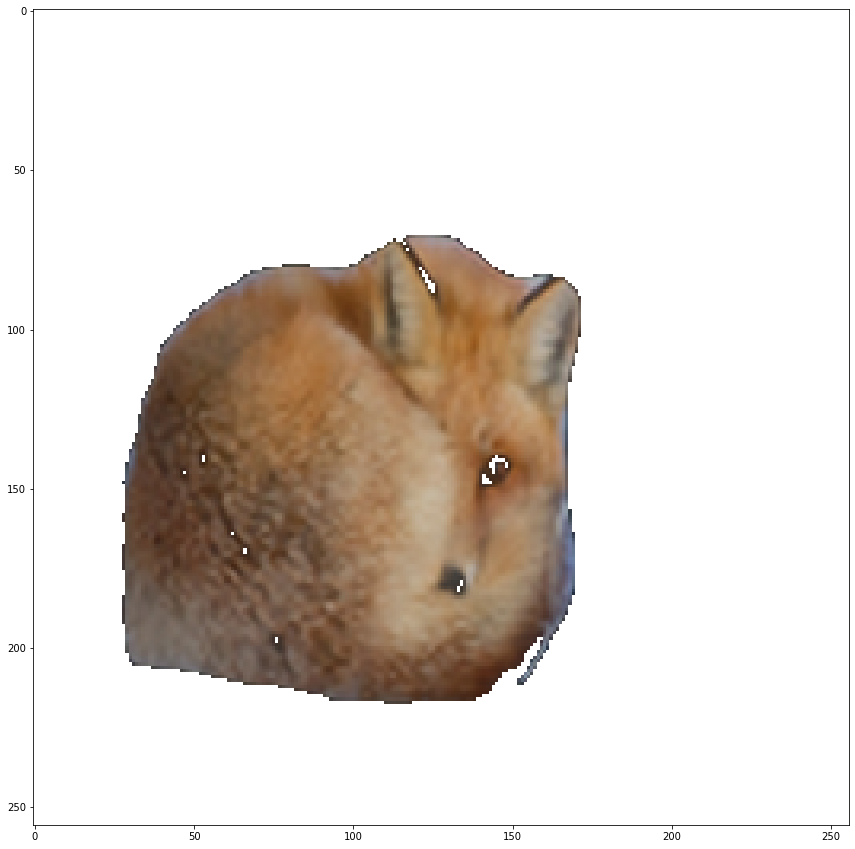

In [ ]:
img = Image.fromarray(final.astype(np.uint8)) # get image
pixels = img.load() # create the pixel map

def checkrange(value,low,high):
  if(value[0]>=low and value[0]<=high):
    if(value[1]>=low and value[1]<=high):
      if(value[2]>=low and value[2]<=high):
        return True

for i in range(img.size[0]): # for every pixel:
    for j in range(img.size[1]):
      if checkrange(pixels[i,j],0,60):
        pixels[i,j] = (255, 255, 255) 
        # if pixels[i,j] == (0,0,0):
plt.figure(figsize=(15,15))
plt.imshow(img)
# img = Image.fromarray(final.astype(np.uint8))
# img = img.save("transparent2.png")

In [ ]:
# img = img.save("/content/drive/My Drive/TestImages/transparent3.png")
overlay = Image.open("/content/drive/My Drive/TestImages/transparentfinal2.png")

In [ ]:
background = Image.fromarray(finalsi.astype(np.uint8))
finalback = background.copy()
finalback.paste(overlay, overlay.size, overlay)

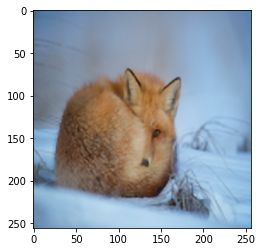

In [ ]:
plt.imshow(finalback)
finalimposedarray = np.asarray(finalback)

In [ ]:
(scoresi, diffsi) = compare_ssim(superimpose_resized,finalimposedarray, full=True,multichannel=True)
diffsi = (diffsi * 255).astype("uint8")
print("SSIM of Original HR vs SuperRes Output: {:.50f}".format(scoresi))

SSIM of Original HR vs SuperRes Output: 0.96462584951578611569544818848953582346439361572266
